In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
data =  pd.read_csv("melb_data.csv")
data.head()


In [ ]:
#Check number of unique values

# loop through each column in the dataset
for column in data.columns:
    # calculate the number of unique values in the column
    unique_values = data[column].nunique()
    # print the column name and number of unique values
    print(f"{column}: {unique_values}")


Variables that have more than 25 unique values will be counted as numeric values

# 2. Variables in dataset

The format goes like this:

VariableName: variable types

Variable description

Rooms: Categorical Qualitative, Ordinal, Discrete

Number of rooms

Price: Numeric, Ratio, Continuous

Price in dollars

Method: Categorical, Nominal, Discrete

S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: Categorical, Nominal, Discrete

br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Categorical, Nominal, Discrete (This is to check whether there is any relationship with agents and price sold, better agents have better price)

Real Estate Agent by their names

Date: 
Date sold

Distance: Numeric, Ratio, Continuous

Distance from CBD

Regionname: Categorical, Nominal, Discrete

General Region (West, North West, North, North east …etc)

Propertycount: Numeric, Interval, Continuous

Number of properties that exist in the suburb.

Bedroom2 : Categorical, Ordinal, Discrete

Scraped # of Bedrooms (from different source)

Bathroom: Categorical, Ordinal, Discrete

Number of Bathrooms

Car: Categorical, Ordinal, Discrete

Number of carspots

Landsize: Numeric, Interval, Continuous

Land Size

BuildingArea: Numeric, Interval, Continuous

Building Size

CouncilArea: Categorical, Nominal, Discrete

Governing council for the area

In [ ]:
#remove redundant and irrelevant attributes:
#Address has 13378 unique values, almost unique for each object. Description rather than category, also overlaps with latitude, longitude, regionname
#method simply describes if property was put on auction or sold
data['Address'].value_counts()

In [ ]:
#remove redundant and irrelevant attributes:
#postcode is redundant
data['Postcode'].value_counts()

In [ ]:
sb.boxplot(x="Method", y="Price", data = data)

In [ ]:
#remove redundant and irrelevant attributes:
#method simply describes how the data is obtained (sold, auction), is irrelevant
data = data.drop(columns=['Address','Method','Postcode'])

In [ ]:
#data cleaning: checking for duplicates
data.duplicated().sum()

In [ ]:
#data cleaning: missing values
data.isna().sum()
#missing values for car can be removed as very few, buildingarea, yearbuilt, councilarea needs replacement

In [ ]:
#data cleaning: missing values
data = data.dropna(subset=['Car'])
data.reset_index(drop=True, inplace=True)
data['BuildingArea'] = data['BuildingArea'].fillna(data['BuildingArea'].median())
data['YearBuilt'] = data['YearBuilt'].fillna(data['YearBuilt'].median())
data['CouncilArea'] = data['CouncilArea'].fillna(data['CouncilArea'].mode()[0])

In [ ]:
#data transformation: yearbuilt to age
data['BuildingAge'] = 2018-data['YearBuilt']
data = data.drop(columns=['YearBuilt'])

In [ ]:
#encoding categorical attributes
#suburb is nominal, has high cardinality with 314 categories - hashing used
categorical = ['Suburb','Type','SellerG','CouncilArea','Regionname']
for x in categorical:
    print(data[x].value_counts())

In [ ]:
#encoding categorical attributes
#suburb
from sklearn.feature_extraction import FeatureHasher
hasher = FeatureHasher(n_features=14, input_type='string')
suburb_encoded = hasher.transform(data['Suburb'])
columns = []
for x in range(0, 14):
    columns.append('Suburb'+str(x))
suburb_encoded = pd.DataFrame(suburb_encoded.toarray(), columns=columns)
#type
data['Type'].value_counts()


In [ ]:
#data transformation: standardization as data contains many outliers
data.boxplot()
plt.yscale("log")
plt.xticks(rotation=90)

In [ ]:
#as data contains many outliers, standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = data.copy()
numeric_columns = ['Rooms','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','BuildingAge','Lattitude','Longtitude','Propertycount']
data_scaled[numeric_columns] = scaler.fit_transform(data_scaled[numeric_columns])

# 3. Exploratory Analysis

In [121]:
df = pd.read_csv("melb_data.csv")
df.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [122]:
# Box-plot helper function, x is categorical, y is numeric variable
def boxplot_helper(x, y, fig_width, fig_height):
    # create a larger figure
    plt.figure(figsize=(fig_width, fig_height))
    # create a boxplot of a categorical variable against a numeric variable
    sb.boxplot(x=x, y=y, data=df, palette='rainbow')
    # add a title to the plot
    plt.title('Boxplot of {} by {}'.format(y, x))
    # show the plot
    plt.show()


In [223]:
#data cleaning: checking for duplicates
data.duplicated().sum()

0

In [224]:
#data cleaning: missing values
data.isna().sum()
#missing values for car can be removed as very few, buildingarea, yearbuilt, councilarea needs replacement

Suburb              0
Rooms               0
Type                0
Price               0
SellerG             0
Date                0
Distance            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [225]:
# Box-plot helper function, x is categorical, y is numeric variable
def scatterplot_helper(x, y, fig_width, fig_height):
    # create a larger figure
    plt.figure(figsize=(fig_width, fig_height))

    # Create the scatter plot
    sb.scatterplot(x=x, y=y, data = df)


    # Add labels and a title
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('Boxplot of {} by {}'.format(y, x))
    
    # show the plot
    plt.show()


In [157]:
def KDEplot_helper(x, fig_width, fig_height):
    # create a larger figure
    plt.figure(figsize=(fig_width, fig_height))

    # Create the scatter plot
    sb.kdeplot(x=x, data=df)

    # Add labels and a title
    plt.xlabel(x)
    plt.title('Boxplot of {} '.format(x))

    # show the plot
    plt.show()


In [227]:
#creating features from date sold
data['Date'] = pd.to_datetime(data['Date'])
data['Year_Sold'] = data['Date'].dt.year
data['Month_Sold'] = data['Date'].dt.month
data['Day_Sold'] = data['Date'].dt.day
data['DayOfWeek_Sold'] = data['Date'].dt.dayofweek
data = data.drop(columns=['Date'])
data[['Year_Sold', 'Month_Sold', 'Day_Sold', 'DayOfWeek_Sold']].head()

C:\Users\shiyi\AppData\Local\Temp\ipykernel_17008\273771942.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


,Year_Sold,Month_Sold,Day_Sold,DayOfWeek_Sold
0,2016,3,12,5
1,2016,4,2,5
2,2017,4,3,0
3,2017,4,3,0
4,2016,4,6,2


In [228]:
#encoding categorical attributes
#suburb, SellerG, CouncilArea are nominal, have high cardinality - binary encoder used for memory concerns
#one-hot encoder for other nominal features - better performance (https://www.diva-portal.org/smash/get/diva2:1259073/FULLTEXT01.pdf)
categorical = ['Suburb','Type','SellerG','CouncilArea','Regionname']
for x in categorical:
    print(data[x].value_counts())

Reservoir         359
Richmond          259
Bentleigh East    249
Preston           239
Brunswick         221
                 ... 
Sandhurst           1
Bullengarook        1
Montrose            1
Croydon South       1
Monbulk             1
Name: Suburb, Length: 314, dtype: int64
h    9389
u    3015
t    1114
Name: Type, dtype: int64
Nelson           1558
Jellis           1303
hockingstuart    1160
Barry            1010
Ray               701
                 ... 
Prowse              1
Luxe                1
Zahn                1
Homes               1
Point               1
Name: SellerG, Length: 268, dtype: int64
Moreland             2470
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash          

In [124]:
mean = df['Price'].mean()
SD = df['Price'].std()
outlierHead = mean - 3*SD
outlierTail = mean + 3*SD
df.drop(df[(df.Price < outlierHead) | (
    df.Price > outlierTail)].index, inplace=True)
df.describe()


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13348.000000,1.334800e+04,13348.000000,13348.000000,13348.000000,13348.000000,13286.000000,13348.000000,6986.000000,8053.000000,13348.000000,13348.000000,13348.000000
mean,2.916692,1.029080e+06,10.183496,3104.807237,2.894591,1.511387,1.595364,554.593722,148.930661,1965.034025,-37.808600,144.994604,7450.260339
std,0.944372,5.247472e+05,5.894988,91.224632,0.956329,0.661775,0.950909,4024.822644,545.899308,37.010392,0.079623,0.104557,4395.583571
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.450000e+05,6.200000,3044.000000,2.000000,1.000000,1.000000,173.000000,92.000000,1945.000000,-37.856600,144.927960,4380.000000
50%,3.000000,9.000000e+05,9.300000,3084.000000,3.000000,1.000000,2.000000,430.000000,125.000000,1970.000000,-37.801130,144.999400,6543.000000
75%,3.000000,1.305000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,650.000000,170.000000,1999.000000,-37.755200,145.058193,10331.000000
max,10.000000,2.990000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [125]:
#data transformation: standardization, not normalization, as data contains many outliers
numeric_data = data[['Rooms','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','BuildingAge','Lattitude','Longtitude','Propertycount']]
plt.yscale("log")
plt.xticks(rotation='vertical')
numeric_data.boxplot()
plt.show()

In [241]:
#train test split before scaling as test set must not influence scaling
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data_encoded, test_size=0.2, random_state=42)
train_set_y = train_set['Price']
train_set_x = train_set.drop(columns=['Price'])
test_set_y = test_set['Price']
test_set_x = test_set.drop(columns=['Price'])

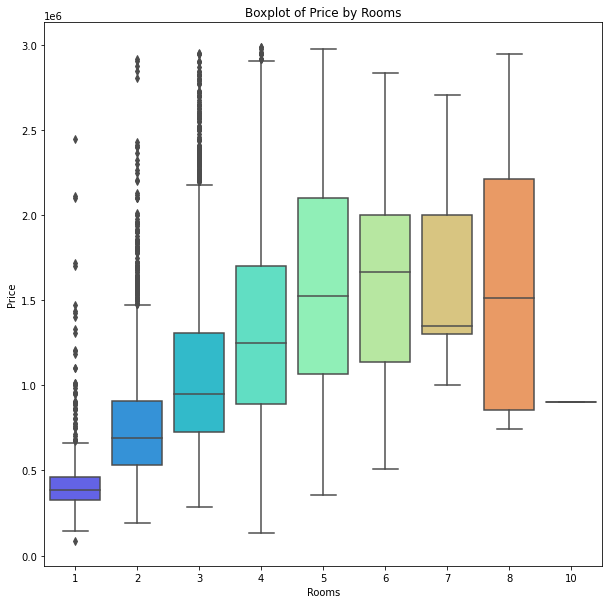

In [242]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_set_x_scaled = train_set_x.copy()
test_set_x_scaled = test_set_x.copy()
numeric_columns = ['Rooms','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','BuildingAge','Lattitude','Longtitude','Propertycount']
train_set_x_scaled[numeric_columns] = scaler.fit_transform(train_set_x_scaled[numeric_columns])
test_set_x_scaled[numeric_columns] = scaler.transform(test_set_x_scaled[numeric_columns])

In [245]:
#pca
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
train_set_x_reduced = pd.DataFrame(pca.fit_transform(train_set_x_scaled))
test_set_x_reduced = pd.DataFrame(pca.transform(test_set_x_scaled))
print(pca.explained_variance_ratio_)
print(pca.components_)

[0.707235   0.08289542 0.0341261  0.02769424 0.01734122 0.01321804
 0.01261113 0.01075598 0.0105524  0.00894697 0.0082485  0.00747291
 0.00476768 0.0043182 ]
[[-8.06342871e-04 -1.26975489e-03  4.10284425e-04 -2.21105349e-05
   1.10337944e-04  2.81125277e-04  3.52003169e-04  1.18699508e-03
   5.21214080e-04 -2.54273325e-03 -3.46154882e-05  1.07707499e-04
  -2.74206596e-04 -5.40778511e-04 -7.32085129e-04 -3.66831416e-04
  -3.03259586e-04  1.29147915e-05  3.16818812e-04 -4.41552611e-03
  -2.38384281e-03  2.47207024e-03 -1.56339790e-03  1.11206723e-03
   1.65546850e-03  3.12991816e-06 -5.05036298e-04 -1.61540458e-03
  -7.54661463e-04  1.28220478e-03 -6.64089643e-04 -1.13269181e-03
  -5.76204617e-04  4.59477591e-04 -1.26604363e-03  2.21443312e-03
   3.93934006e-03 -9.92376109e-01 -1.22903608e-01 -1.15560820e-03
   7.67981547e-06  1.14792838e-03 -3.59959527e-04 -1.19594556e-04
  -8.00452388e-04  1.65918748e-05 -4.98556262e-05  1.33990368e-03
   4.60388408e-05 -7.26722939e-05]
 [-1.37381782e-